In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def glal(A,B,match=2,mismatch=-1,gap=-2):
    n=len(A)
    m=len(B)
    F=np.zeros((n+1,m+1),dtype=int)
    trace_back_temp = np.zeros((n+1,m+1), dtype='object')
    trace_back = np.zeros((n+1,m+1), dtype='object')
    trace_back[:] = ''

    for i in range (0,m+1):
        F[0,i]=i*gap
    for j in range(0, n + 1):
        F[j, 0] = j * gap

    # Calculating F matrix and trace_back_temp matrix
    for i in range (1,n+1):
        for j in range (1,m+1):
            if A[i-1]==B[j-1]:
                d=F[i-1,j-1]+match
            else:
                d=F[i-1,j-1]+mismatch
            up=F[i-1,j]+gap
            left=F[i,j-1]+gap
            F[i,j]=max(d,up,left)

            if F[i,j]==d:
                trace_back_temp[i,j]='D'
            elif F[i,j]==up:
                trace_back_temp[i,j]='U'
            else:
                trace_back_temp[i,j]='L'

    # Trace back
    i=n
    j=m
    resA=""
    resB=""
    while j>0 and i>0:
        if trace_back_temp[i,j]=='D':
            trace_back[i,j]='D'
            resA=A[i-1]+resA
            resB = B[j - 1] + resB
            i-=1
            j-=1
        elif trace_back_temp[i,j]=='L':
            trace_back[i, j] = 'L'
            resA = "-" + resA
            resB = B[j - 1] + resB
            j -= 1
        else:
            trace_back[i, j] = 'U'
            resB = "-" + resB
            resA = A[i - 1] + resA
            i -= 1

    return F,trace_back,resA,resB,F[n,m]

In [3]:
def permutations_score(seq1,seq2,original_score,match=2,mismatch=-1,gap=-2):
    per_scores=[]
    count=0
    sim=10000
    for i in range (1,sim):
        permutation1 = ''.join(np.random.permutation(list(seq1)))
        permutation2 = ''.join(np.random.permutation(list(seq2)))
        F, trace_back, align1, align2, score=glal(permutation1,permutation2,match,mismatch,gap)
        per_scores.append(score)
        if score >= original_score:
            count+=1

    p_value=count/sim
    print(count)
    return p_value,per_scores

In [4]:
seq1='AGGCT'
seq2='AGCCAT'
F, trace_back, align1, align2, score = glal(seq1, seq2)
print("seqA = ",seq1)
print("seqB = ",seq2)
print("F matrix:\n", F)
print("Trace back:\n", trace_back)
print("Alignment:\n", align1, "\n", align2)
print("Score:\n", score)

seqA =  AGGCT
seqB =  AGCCAT
F matrix:
 [[  0  -2  -4  -6  -8 -10 -12]
 [ -2   2   0  -2  -4  -6  -8]
 [ -4   0   4   2   0  -2  -4]
 [ -6  -2   2   3   1  -1  -3]
 [ -8  -4   0   4   5   3   1]
 [-10  -6  -2   2   3   4   5]]
Trace back:
 [['' '' '' '' '' '' '']
 ['' 'D' '' '' '' '' '']
 ['' '' 'D' '' '' '' '']
 ['' '' '' 'D' '' '' '']
 ['' '' '' '' 'D' 'L' '']
 ['' '' '' '' '' '' 'D']]
Alignment:
 AGGC-T 
 AGCCAT
Score:
 5


In [5]:
seq1 = 'GAATTCAGTTA'
seq2 = 'GGATCGTTA'
F, trace_back, align1, align2, score = glal(seq1, seq2)
F, trace_back, align1, align2, score = glal(seq1, seq2)
print("seqA = ",seq1)
print("seqB = ",seq2)
print("F matrix:\n", F)
print("Trace back:\n", trace_back)
print("Alignment:\n", align1, "\n", align2)
print("Score:\n", score)

seqA =  GAATTCAGTTA
seqB =  GGATCGTTA
F matrix:
 [[  0  -2  -4  -6  -8 -10 -12 -14 -16 -18]
 [ -2   2   0  -2  -4  -6  -8 -10 -12 -14]
 [ -4   0   1   2   0  -2  -4  -6  -8 -10]
 [ -6  -2  -1   3   1  -1  -3  -5  -7  -6]
 [ -8  -4  -3   1   5   3   1  -1  -3  -5]
 [-10  -6  -5  -1   3   4   2   3   1  -1]
 [-12  -8  -7  -3   1   5   3   1   2   0]
 [-14 -10  -9  -5  -1   3   4   2   0   4]
 [-16 -12  -8  -7  -3   1   5   3   1   2]
 [-18 -14 -10  -9  -5  -1   3   7   5   3]
 [-20 -16 -12 -11  -7  -3   1   5   9   7]
 [-22 -18 -14 -10  -9  -5  -1   3   7  11]]
Trace back:
 [['' '' '' '' '' '' '' '' '' '']
 ['' 'D' '' '' '' '' '' '' '' '']
 ['' '' 'D' '' '' '' '' '' '' '']
 ['' '' '' 'D' '' '' '' '' '' '']
 ['' '' '' 'U' '' '' '' '' '' '']
 ['' '' '' '' 'D' '' '' '' '' '']
 ['' '' '' '' '' 'D' '' '' '' '']
 ['' '' '' '' '' 'U' '' '' '' '']
 ['' '' '' '' '' '' 'D' '' '' '']
 ['' '' '' '' '' '' '' 'D' '' '']
 ['' '' '' '' '' '' '' '' 'D' '']
 ['' '' '' '' '' '' '' '' '' 'D']]
Alignment:
 G

48
The p-value is 0.0048


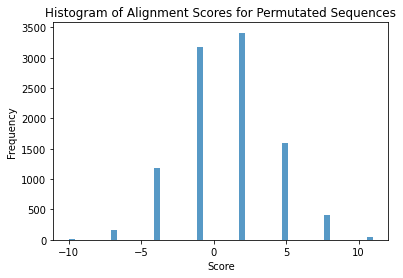

In [6]:
original_score=score
p_value,per_scores=permutations_score(seq1, seq2,original_score)
print(f"The p-value is {p_value:.4f}")

plt.hist(per_scores, bins=50, alpha=0.75)
plt.title('Histogram of Alignment Scores for Permutated Sequences')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()